In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")
print(df.head())

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


In [3]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


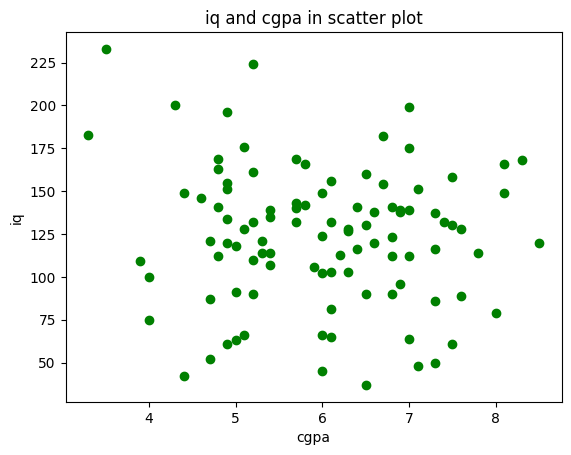

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"], df["iq"], color="green")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.title("iq and cgpa in scatter plot")
plt.show()

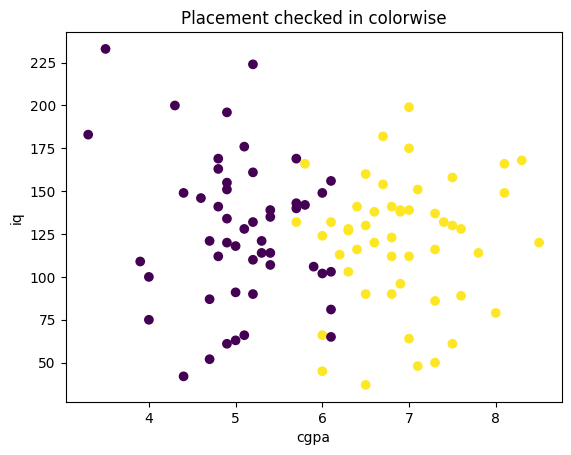

In [5]:
plt.scatter(df["cgpa"], df["iq"], c=df["placement"])
plt.title("Placement checked in colorwise")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.show()

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print(X_train.head(2))
print()
print(X_test.head(2))
print()
print(y_train.head(2))
print()
print(y_test.head(2))

    cgpa     iq
32   7.0  139.0
38   6.5  160.0

    cgpa     iq
48   6.6  138.0
35   6.8   90.0

32    1
38    1
Name: placement, dtype: int64

48    1
35    1
Name: placement, dtype: int64


In [8]:
# Train Test split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train)
# print()
# print(X_test)

In [9]:
# Model Training

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_predict = clf.predict(X_test)

In [12]:
# Accuracy Predict using sklearn

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.88

In [14]:
import pickle

In [15]:
pickle.dump(clf, open("placement_model.pkl", "wb"))